In [1]:
import ROOT as R
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

R.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.20/06


In [2]:
f = R.TFile("output_histos_wjetcr_v2.root")

In [ ]:
f.ls()

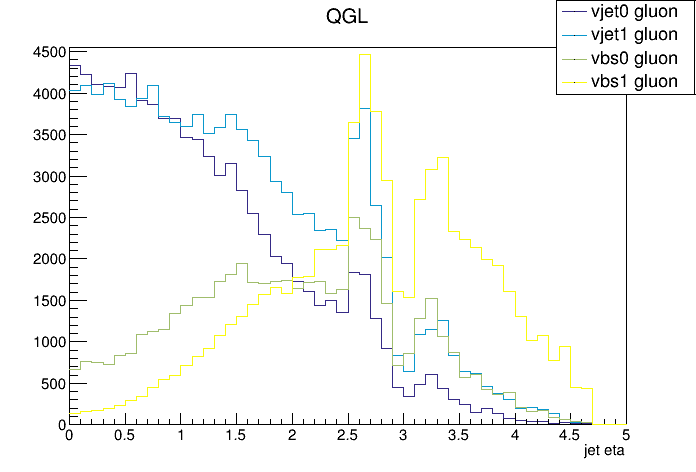

In [5]:
c =R.TCanvas()
vjet0_eta = f.Get('vjet0_gluon_eta')
vjet1_eta = f.Get('vjet1_gluon_eta')
vbs0_eta = f.Get('vbs0_gluon_eta')
vbs1_eta = f.Get('vbs1_gluon_eta')

l = R.TLegend(0.8, 0.8, 1, 1)
vjet0_eta.Draw("PLC hist")
vjet1_eta.Draw("same PLC  hist")
vbs0_eta.Draw("same PLC  hist")
vbs1_eta.Draw("same PLC  hist")
l.AddEntry(vjet0_eta, "vjet0 gluon")
l.AddEntry(vjet1_eta, "vjet1 gluon")
l.AddEntry(vbs0_eta, "vbs0 gluon")
l.AddEntry(vbs1_eta, "vbs1 gluon")
vjet0_eta.GetXaxis().SetTitle("jet eta")
l.Draw("same")
c.Draw()



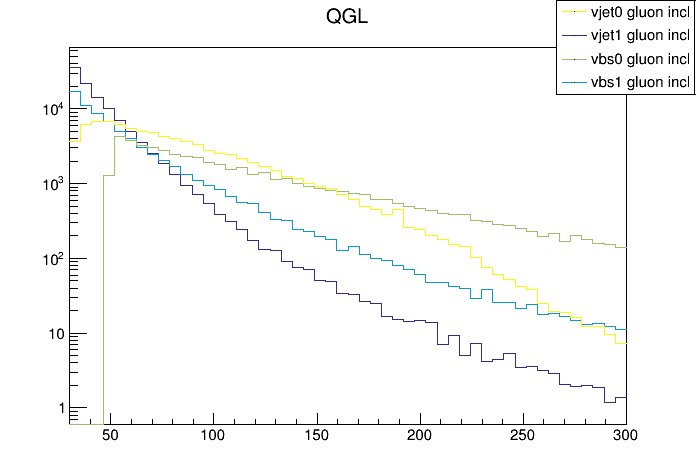

In [6]:
c =R.TCanvas()
vjet0_pt = f.Get('vjet0_gluon_pt')
vjet1_pt = f.Get('vjet1_gluon_pt')
vbs0_pt = f.Get('vbs0_gluon_pt')
vbs1_pt = f.Get('vbs1_gluon_pt')

l = R.TLegend(0.8, 0.8, 1, 1)
vjet1_pt.Draw("PLC hist")
vbs1_pt.Draw("same PLC hist")
vbs0_pt.Draw("same PLC hist")
vjet0_pt.Draw("same PLC hist")
l.AddEntry(vjet0_pt, "vjet0 gluon incl")
l.AddEntry(vjet1_pt, "vjet1 gluon incl")
l.AddEntry(vbs0_pt, "vbs0 gluon incl")
l.AddEntry(vbs1_pt, "vbs1 gluon incl")
vjet0_pt.GetXaxis().SetTitle("jet Pt")
l.Draw("same")
c.SetLogy()
c.Draw()



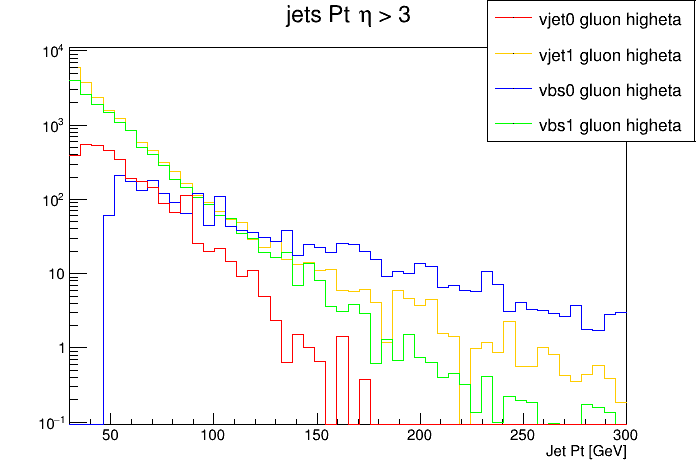

In [8]:
c =R.TCanvas()
vjet0_pt = f.Get('vjet0_gluon_pt_higheta')
vjet1_pt = f.Get('vjet1_gluon_pt_higheta')
vbs0_pt = f.Get('vbs0_gluon_pt_higheta')
vbs1_pt = f.Get('vbs1_gluon_pt_higheta')

l = R.TLegend(0.7, 0.7, 1, 1)
vjet1_pt.Draw(" hist")
vbs1_pt.Draw("same  hist")
vbs0_pt.Draw("same  hist")
vjet0_pt.Draw("same  hist")
l.AddEntry(vjet0_pt, "vjet0 gluon higheta")
l.AddEntry(vjet1_pt, "vjet1 gluon higheta")
l.AddEntry(vbs0_pt, "vbs0 gluon higheta")
l.AddEntry(vbs1_pt, "vbs1 gluon higheta")
vbs0_pt.SetLineColor(R.kBlue)
vbs1_pt.SetLineColor(R.kGreen)
vjet0_pt.SetLineColor(R.kRed)
vjet1_pt.SetLineColor(R.kOrange)
vjet0_pt.GetXaxis().SetTitle("jet Pt")
c.SetLogy()
vjet1_pt.SetTitle("jets Pt #eta > 3;Jet Pt [GeV]")
l.Draw("same")
c.Draw()

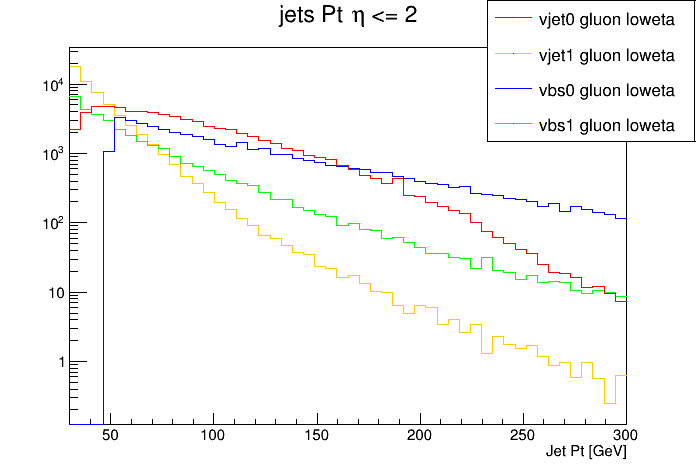

In [10]:
c =R.TCanvas()
vjet0_pt = f.Get('vjet0_gluon_pt_loweta')
vjet1_pt = f.Get('vjet1_gluon_pt_loweta')
vbs0_pt = f.Get('vbs0_gluon_pt_loweta')
vbs1_pt = f.Get('vbs1_gluon_pt_loweta')

l = R.TLegend(0.7, 0.7, 1, 1)
vjet1_pt.Draw("hist")
vbs1_pt.Draw("same hist")
vbs0_pt.Draw("same  hist")
vjet0_pt.Draw("same  hist")
l.AddEntry(vjet0_pt, "vjet0 gluon loweta")
l.AddEntry(vjet1_pt, "vjet1 gluon loweta")
l.AddEntry(vbs0_pt, "vbs0 gluon loweta")
l.AddEntry(vbs1_pt, "vbs1 gluon loweta")
vbs0_pt.SetLineColor(R.kBlue)
vbs1_pt.SetLineColor(R.kGreen)
vjet0_pt.SetLineColor(R.kRed)
vjet1_pt.SetLineColor(R.kOrange)
vjet0_pt.GetXaxis().SetTitle("jet Pt")
c.SetLogy()
vjet1_pt.SetTitle("jets Pt #eta <= 2;Jet Pt [GeV]")
l.Draw("same")
c.Draw()

In [3]:
jet = 'vjet0_loweta'
hG = f.Get(jet + '_gluon')    
hQ = f.Get(jet + '_quark') 
hData = f.Get('DATA_'+ jet )
hOthers = f.Get('Fake_'+ jet)

nTot = hG.Integral() + hQ.Integral() + hOthers.Integral()
# Scale data to tot MC
hData.Scale(nTot / hData.Integral())

hG_target = hData.Clone("hG_target")
hG_target.Add(hOthers, -1.)
hG_target.Add(hQ, -1.)

True

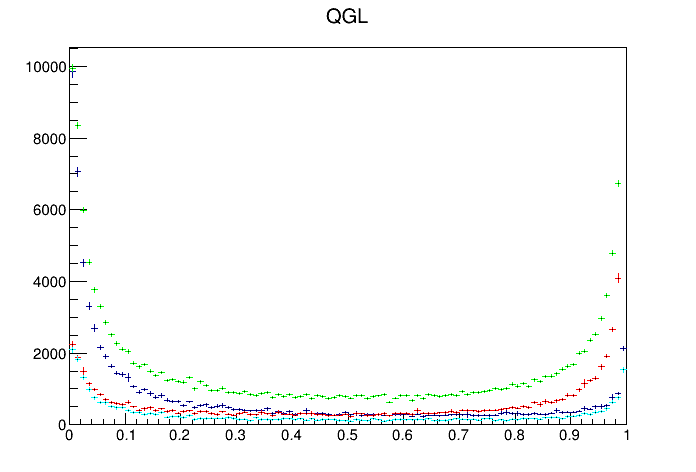

In [5]:
c = R.TCanvas()
hG.Draw()
hQ.Draw("same")
hQ.SetLineColor(R.kRed)
hData.Draw("same")
hData.SetLineColor(R.kGreen)
hOthers.Draw("same")
hOthers.SetLineColor(R.kCyan)
c.Draw()

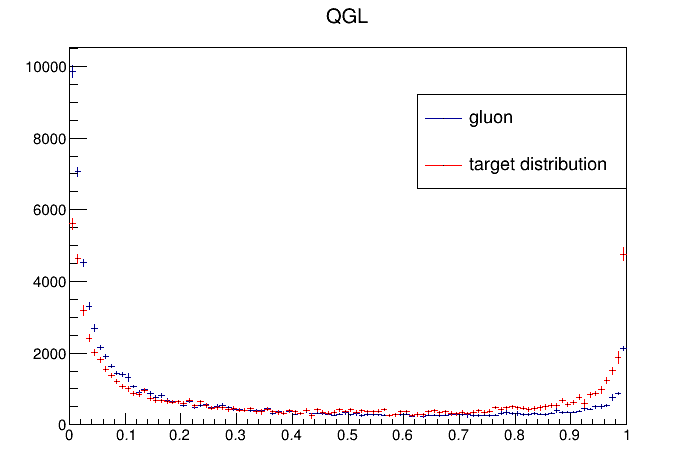

In [7]:
c = R.TCanvas()
l = R.TLegend(0.6, 0.6,0.9, 0.8)
hG.Draw()
hG_target.Draw("same")
hG_target.SetLineColor(R.kRed)
l.AddEntry(hG, "gluon")
l.AddEntry(hG_target, "target distribution")
l.Draw("same")
c.Draw()

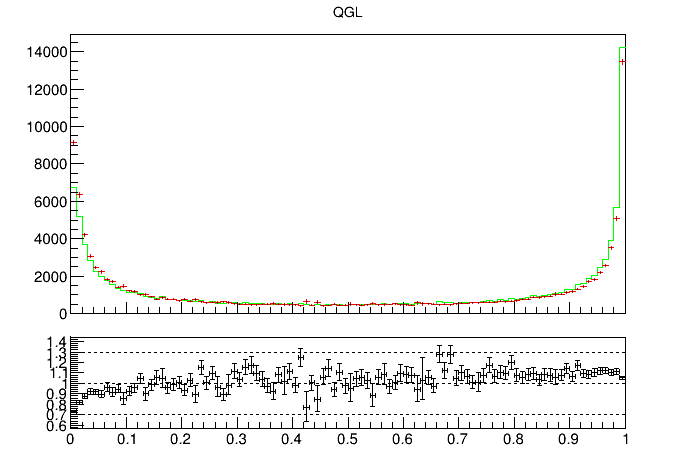

In [20]:
hTotMC = hQ.Clone("h_tot_MC")
hTotMC.Add(hG)
hTotMC.Add(hOthers)
c= R.TCanvas()
ratio = R.TRatioPlot(hData, hTotMC)
ratio.Draw()
c.Draw()

### Function to extract the morphing function

In [12]:
def get_cdf_func(h_i, name):
    h = h_i.Clone(name)
    h.Scale(1/h.Integral())
    h_cdf = h.GetCumulative()
    g_cdf = R.TGraph()
    g_inv = R.TGraph()
    g_cdf.SetName(name + '_cdf')
    g_inv.SetName(name + '_inv')
    g_cdf.SetBit(19)
    g_inv.SetBit(19)
    g_cdf.SetPoint(0, 0., 0.)
    g_inv.SetPoint(0, 0., 0.)
    for ibin in range(1, h_cdf.GetNbinsX()+1):
        #print(ibin,  h_cdf.GetBinCenter(ibin), h_cdf.GetBinContent(ibin))
        g_cdf.SetPoint(ibin, h_cdf.GetBinCenter(ibin), h_cdf.GetBinContent(ibin))
        g_inv.SetPoint(ibin, h_cdf.GetBinContent(ibin),h_cdf.GetBinCenter(ibin))
    g_cdf.SetPoint(ibin+1, 1., 1.)
    g_inv.SetPoint(ibin+1, 1., 1.)
    return g_cdf, g_inv


def get_morphing(gG, gT_inv, name):
    t = R.TGraph()
    t.SetName("gluon_morphing_"+name)
    for i,x in enumerate(np.linspace(0.,1.,200)):
        y = gT_inv.Eval(gG.Eval(x))
        t.SetPoint(i,x,y)
    return t

In [5]:
gG, gG_inv= get_cdf_func(hG, 'gluon')
gT , gT_inv = get_cdf_func(hG_target, 'gluon_target')

morph = get_morphing(gG, gT_inv, jet)

In [18]:
gT_inv.Eval(gG.Eval(0.3,0, "S"))

0.5641351176258056

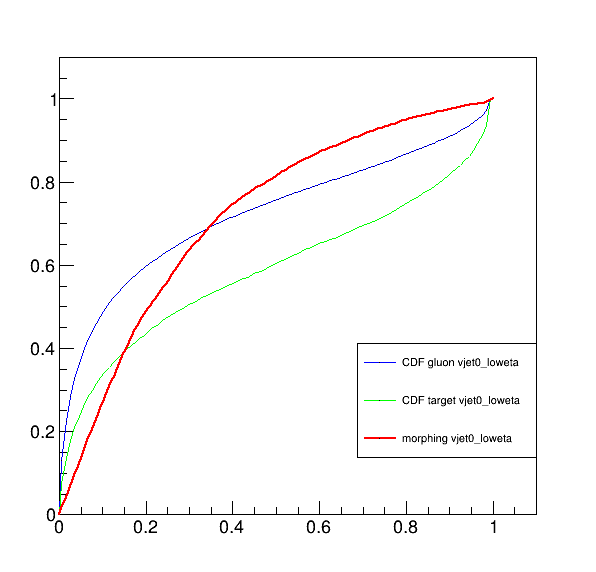

In [6]:
c = R.TCanvas("","",600,600)
leg = R.TLegend(0.6,0.2,0.9,0.4)
gG.Draw("APL")
gT.Draw("Same")
morph.Draw("same")
morph.SetLineColor(R.kRed)
morph.SetLineWidth(2)
gG.SetLineColor(R.kBlue)
gT.SetLineColor(R.kGreen)
leg.AddEntry(gG, "CDF gluon "+jet)
leg.AddEntry(gT, "CDF target "+jet)
leg.AddEntry(morph, "morphing "+jet)
leg.Draw("same")
c.Draw()

# Comparison between jets

In [13]:
out = R.TFile("morphing_qgl_gluon.root", "RECREATE")
morphs = {}
cdfs = {}
target_cdfs = {}

for j in ['vjet0', 'vjet1','vbs0','vbs1']:
    for i in [ "","_higheta","_loweta"] :
        jet = j+i
        hG = f.Get(jet + '_gluon')    
        hQ = f.Get(jet + '_quark') 
        hData = f.Get('DATA_'+ jet )
        hOthers = f.Get('Fake_'+ jet)

        nTot = hG.Integral() + hQ.Integral() + hOthers.Integral()
        # Scale data to tot MC
        hData.Scale(nTot / hData.Integral())

        hG_target = hData.Clone("hG_target_"+jet)
        hG_target.Add(hOthers, -1.)
        hG_target.Add(hQ, -1.)

        gG, gG_inv= get_cdf_func(hG, jet)
        gT , gT_inv = get_cdf_func(hG_target, jet + "_target")
        morph = get_morphing(gG, gT_inv, jet)
        morph.Write()
        morphs[jet] = morph
        cdfs[jet]= hG
        target_cdfs[jet] = gT
        

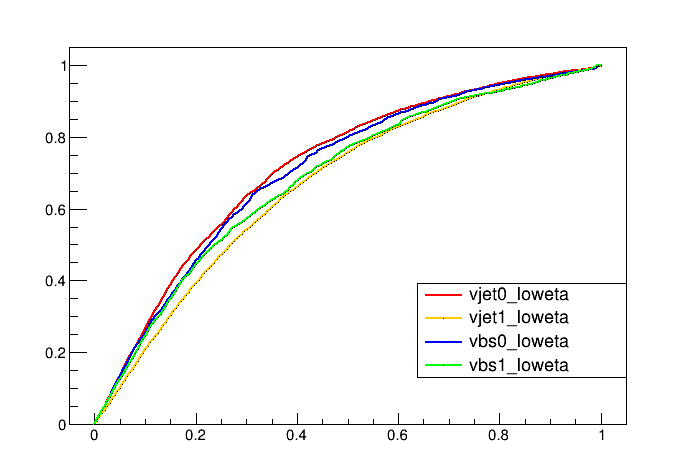

In [14]:
c = R.TCanvas()
leg = R.TLegend(0.6,0.2,0.9,0.4)
mg = R.TMultiGraph()
for i,(label, gr) in enumerate(morphs.items()):
    if "loweta" in label:
        mg.Add(gr)
        leg.AddEntry(gr, label)
        gr.SetLineWidth(2)
        if "vbs0" in label:  gr.SetLineColor(R.kBlue)
        if "vbs1" in label:  gr.SetLineColor(R.kGreen)
        if "vjet0" in label:  gr.SetLineColor(R.kRed)
        if "vjet1" in label:  gr.SetLineColor(R.kOrange)       

mg.Draw("APL")
leg.Draw("same")
c.Draw()

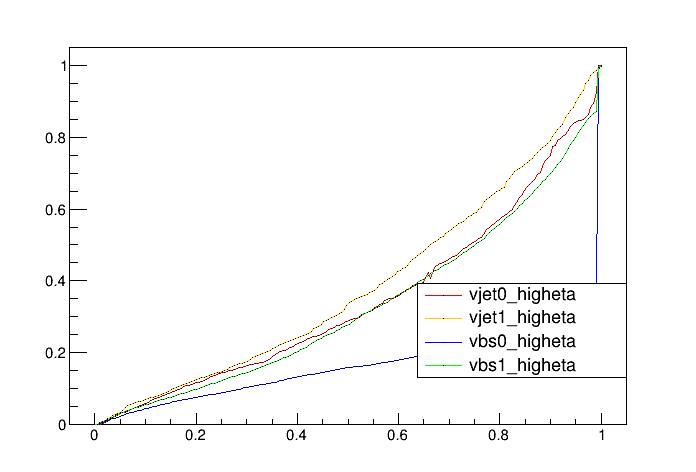

In [15]:
c = R.TCanvas()
leg = R.TLegend(0.6,0.2,0.9,0.4)
mg = R.TMultiGraph()
for i,(label, gr) in enumerate(morphs.items()):
    if "higheta" in label:
        mg.Add(gr)
        leg.AddEntry(gr, label)
        if "vbs0" in label:  gr.SetLineColor(R.kBlue)
        if "vbs1" in label:  gr.SetLineColor(R.kGreen)
        if "vjet0" in label:  gr.SetLineColor(R.kRed)
        if "vjet1" in label:  gr.SetLineColor(R.kOrange)  

mg.Draw("APL")
leg.Draw("same")
c.Draw()

# Purity

In [3]:
fractions = {}

for j in ['vjet0', 'vjet1','vbs0','vbs1']:
    for i in [ "","_higheta","_loweta"] :
        jet = j+i
        hG = f.Get(jet + '_gluon')    
        hQ = f.Get(jet + '_quark') 
        hOthers = f.Get('Fake_'+ jet)

        nTot = hG.Integral() + hQ.Integral() + hOthers.Integral()
        fractions[jet] = [
            ["gluon","quark","others"],
            [100* hG.Integral()/ nTot, 100*hQ.Integral()/ nTot,100*hOthers.Integral()/ nTot,]
        ]
        print(jet)
        
        

vjet0
vjet0_higheta
vjet0_loweta
vjet1
vjet1_higheta
vjet1_loweta
vbs0
vbs0_higheta
vbs0_loweta
vbs1
vbs1_higheta
vbs1_loweta


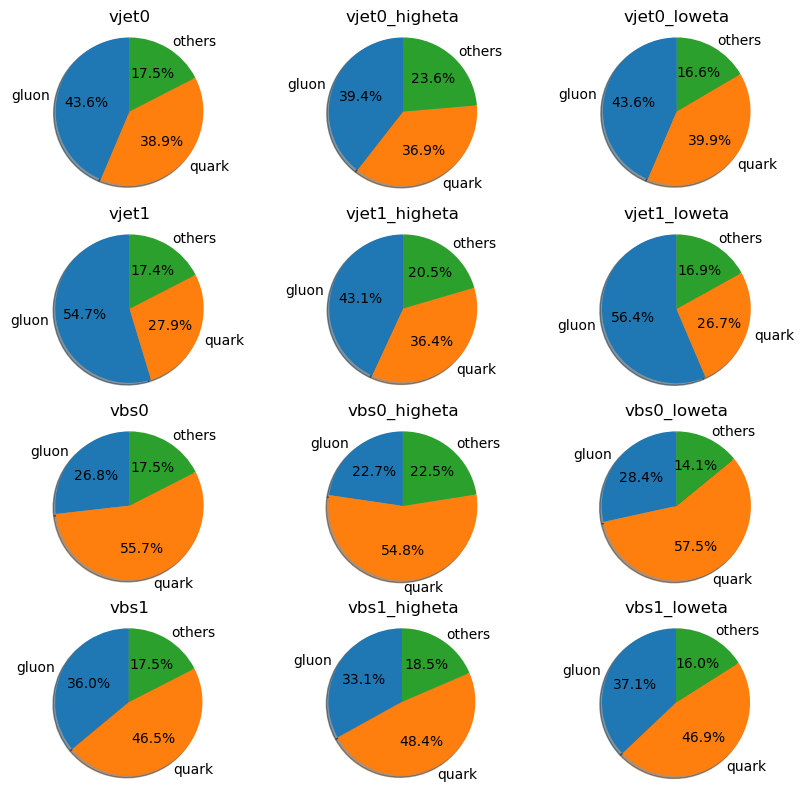

In [4]:
import matplotlib.pyplot as plt

fig1, axs = plt.subplots(4,3, figsize=(10,10), dpi=100)
for i,(jet,data) in enumerate(fractions.items()):
    
    row = i//3
    col = i%3
    axs[row,col].pie(data[1], labels=data[0], autopct='%1.1f%%',
            shadow=True, startangle=90)
    axs[row,col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[row,col].set_title(jet)
plt.show()
